In [ ]:
Nama : NUR AISYAH
Kelas :Machine Learning B
NIM : 1217070060

In [2]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk import ngrams, word_tokenize
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import PorterStemmer
from sklearn import metrics

In [4]:
df = pd.read_csv(r"C:\Users\User\Downloads\Praktikum 1\Praktikum 1\Bahan data\ISEAR.csv", header=None)
df.head()

,0,1,2
0,joy,On days when I feel close to my partner and ot...,NaN
1,fear,Every time I imagine that someone I love or I ...,NaN
2,anger,When I had been obviously unjustly treated and...,NaN
3,sadness,When I think about the short time that we live...,NaN
4,disgust,At a gathering I found myself involuntarily si...,NaN


In [6]:
col = [0, 1]
new_df = df[col]
new_df = new_df[pd.notnull(df[1])]
new_df.columns = ['Emotion', 'Text']
new_df.head()

,Emotion,Text
0,joy,On days when I feel close to my partner and ot...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...


Matplotlib is building the font cache; this may take a moment.


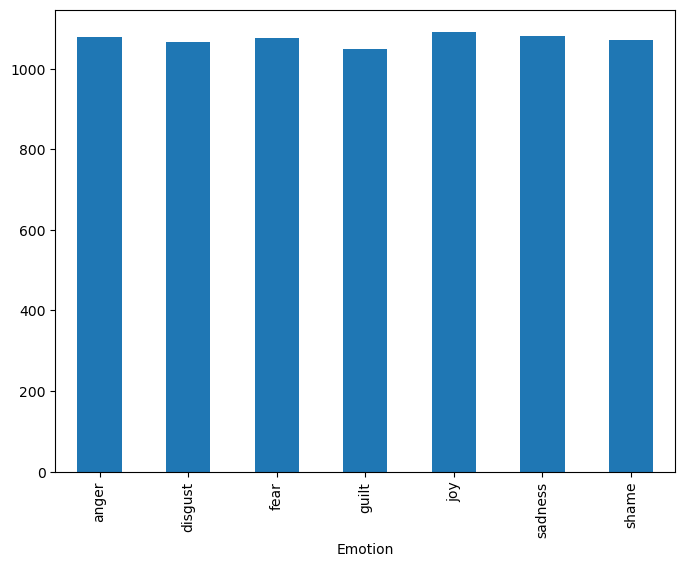

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 6))
new_df.groupby('Emotion').Text.count().plot.bar(ylim=0)
plt.show()

In [10]:
new_df['Text']
new_df['Emotion']

0           joy
1          fear
2         anger
3       sadness
4       disgust
         ...   
7511      shame
7512      shame
7513       fear
7514      guilt
7515       fear
Name: Emotion, Length: 7516, dtype: object

In [12]:
def getTokenizedList(input_df):
    tokenizedList = []
    for i in range(0, len(input_df)):
        curText = input_df[1].iloc[i]
        curText = curText.replace('\n', '')
        curTokenized =word_tokenize(curText)
        tokenizedList.append(curTokenized)
    
    # Remove punctuation
    tokenizedListWithoutPunct = []
    punctList = list(string.punctuation)
    for i in range(0, len(tokenizedList)):
        curList = tokenizedList[i]
        newList = [] # List without punctuation
        for word in curList:
            if word.lower() not in punctList:
                newList.append(word.lower())
        tokenizedListWithoutPunct.append(newList)

    # Stemming
    mystemmer = PorterStemmer()
    tokenizedStemmed = []
    for i in range(0, len(tokenizedListWithoutPunct)):
        curList = tokenizedListWithoutPunct[i]
        newList = []
        for word in curList:
            newList.append(mystemmer.stem(word))
        tokenizedStemmed.append(newList)
    
    return tokenizedStemmed

In [14]:
def transformSentence(sent):
    s = []
    sent = sent.replace('\n', '')
    sentTokenized = word_tokenize(sent)
    s.append(sentTokenized)
    
    sWithoutPunct = []
    punctList = list(string.punctuation)
    curSentList = s[0]
    newSentList = []
    
    for word in curSentList:
        if word.lower() not in punctList:
            newSentList.append(word.lower())
    
    sWithoutPunct.append(newSentList)
    
    mystemmer = PorterStemmer()
    tokenizedStemmed = []
    
    for i in range(0, len(sWithoutPunct)):
        curList = sWithoutPunct[i]
        newList = []
        
        for word in curList:
            newList.append(mystemmer.stem(word))
        
        tokenizedStemmed.append(newList)
    
    return tokenizedStemmed

In [16]:
X_train, X_test, Y_train, Y_test=train_test_split(new_df['Text'],new_df['Emotion'], test_size=.3,random_state=1)

In [18]:
def returnPhrase(inputList):
    return inputList

In [22]:
#Extracting features for Naive Bayes

myVectorizer=TfidfVectorizer(analyzer='word',tokenizer=returnPhrase,preprocessor=returnPhrase,token_pattern=None,ngram_range=(1,3))
myVectorizer.fit(X_train)
transformedTrain=myVectorizer.transform(X_train).toarray()
transformedTest=myVectorizer.transform(X_test).toarray()

In [26]:
curAlpha = 0.33  # smoothing factor in Naive Bayes
NBClassifier = MultinomialNB(alpha=curAlpha)
NBClassifier.fit(transformedTrain, Y_train)
myPredTest = NBClassifier.predict(transformedTest)
print('Best Accuracy Naive Bayes')
print(np.sum(myPredTest == Y_test) / len(Y_test))

Best Accuracy Naive Bayes
0.5121951219512195


In [28]:
print('Metrics Classification Report: Naive Bayes') 
print(metrics.classification_report (Y_test,myPredTest))

Metrics Classification Report: Naive Bayes
              precision    recall  f1-score   support

       anger       0.41      0.43      0.42       331
     disgust       0.65      0.46      0.54       324
        fear       0.58      0.66      0.62       311
       guilt       0.34      0.52      0.41       299
         joy       0.61      0.59      0.60       323
     sadness       0.66      0.54      0.59       351
       shame       0.45      0.40      0.42       316

    accuracy                           0.51      2255
   macro avg       0.53      0.51      0.51      2255
weighted avg       0.53      0.51      0.52      2255



In [30]:
myVectorizer=TfidfVectorizer(analyzer='word',tokenizer=returnPhrase,preprocessor=returnPhrase,token_pattern=None,ngram_range=(1,3))
myVectorizer.fit(X_train)
transformedTrain=myVectorizer.transform(X_train).toarray()
transformedTest=myVectorizer.transform(X_test).toarray()                                    

In [41]:
curC = 2  # Cost factor in SVM
SVMClassifier = svm.LinearSVC(C=curC)
SVMClassifier.fit(transformedTrain,Y_train)
myPredTest = SVMClassifier.predict(transformedTest)

print('Best Accuracy SVM')
print(np.sum(myPredTest == Y_test) / len(Y_test))


C:\Users\User\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Best Accuracy SVM
0.5627494456762749


In [45]:
print('Metrics Classification Report: SVM')
print(metrics.classification_report (Y_test,myPredTest))

Metrics Classification Report: SVM
              precision    recall  f1-score   support

       anger       0.47      0.44      0.46       331
     disgust       0.60      0.58      0.59       324
        fear       0.68      0.68      0.68       311
       guilt       0.46      0.48      0.47       299
         joy       0.64      0.69      0.66       323
     sadness       0.61      0.64      0.63       351
       shame       0.45      0.42      0.43       316

    accuracy                           0.56      2255
   macro avg       0.56      0.56      0.56      2255
weighted avg       0.56      0.56      0.56      2255



In [76]:
def predictSentNB(sent):
    sendPred = NBClassifier.predict(myVectorizer.transform(transformSentence(sent)).toarray())
    return sendPred

In [78]:
def predictSentSVM(sent):
    sentPred = SVMClassifier.predict(myVectorizer.transform(transformSentence(sent)).toarray())
    return sentPred

In [80]:
sent = "I saw cat poop on the floor"

print("Naive Bayes prediction")
print(predictSentNB(sent))

print("SVM prediction")
print(predictSentSVM(sent))

Naive Bayes prediction
['disgust']
SVM prediction
['guilt']


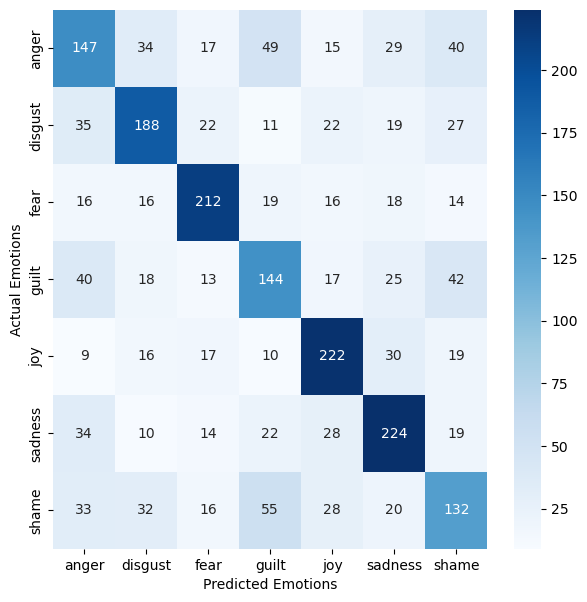

In [84]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

labels = ['anger', 'disgust', 'fear', 'guilt', 'joy', 'sadness', 'shame']
cm = confusion_matrix(Y_test, myPredTest, labels=labels)

#print(cm)
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.ylabel('Actual Emotions')
plt.xlabel('Predicted Emotions')
plt.show()
